# Rainfall Prediction Model

### Importing Libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

%matplotlib inline

In [43]:
df = pd.read_csv(r"C:\Users\Anisha Ray\Downloads\archive (4)\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [44]:
print(df.info())
print("----------------------------")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [45]:
df.Date = df.Date.apply(pd.to_datetime)
df['month'] = df.Date.apply(lambda x: x.month)
df['day'] = df.Date.apply(lambda x: x.day)
df['year'] = df.Date.apply(lambda x: x.year)
df.drop(['Date'], 1, inplace = True)

C:\Users\Anisha Ray\AppData\Local\Temp/ipykernel_22752/3958328284.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Date'], 1, inplace = True)


In [46]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [47]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
month                0
day                  0
year                 0
dtype: int64

In [48]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.000000,12.194034,6.398495,-8.500000,7.600000,12.000000,16.900000,33.900000
MaxTemp,144199.000000,23.221348,7.119049,-4.800000,17.900000,22.600000,28.200000,48.100000
Rainfall,142199.000000,2.360918,8.478060,0.000000,0.000000,0.000000,0.800000,371.000000
Evaporation,82670.000000,5.468232,4.193704,0.000000,2.600000,4.800000,7.400000,145.000000
Sunshine,75625.000000,7.611178,3.785483,0.000000,4.800000,8.400000,10.600000,14.500000
WindGustSpeed,135197.000000,40.035230,13.607062,6.000000,31.000000,39.000000,48.000000,135.000000
WindSpeed9am,143693.000000,14.043426,8.915375,0.000000,7.000000,13.000000,19.000000,130.000000
WindSpeed3pm,142398.000000,18.662657,8.809800,0.000000,13.000000,19.000000,24.000000,87.000000
Humidity9am,142806.000000,68.880831,19.029164,0.000000,57.000000,70.000000,83.000000,100.000000
Humidity3pm,140953.000000,51.539116,20.795902,0.000000,37.000000,52.000000,66.000000,100.000000


In [49]:
for feature in df.columns:
    if df[feature].dtype not in ['int64', 'float64']:   
        print(f"{feature}:{df[feature].unique()}")

Location:['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir:['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am:['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm:['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday:['No' 'Yes' nan]
RainTomorrow:['No' 'Yes' nan]


In [50]:
df['Sunshine'].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [51]:
df["Evaporation"].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

### Preprocessing

In [52]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 =SimpleImputer(missing_values = np.nan, strategy = 'median')
df[['Evaporation']] = imputer2.fit_transform(df[['Evaporation']])
df[['Sunshine']] = imputer1.fit_transform(df[['Sunshine']])
df[['Cloud3pm']] = imputer2.fit_transform(df[['Cloud3pm']])
df[['Cloud9am']] = imputer1.fit_transform(df[['Cloud9am']])
#mean and median are same for Pressure9am and Pressure3pm
df[['Pressure9am']] = imputer1.fit_transform(df[['Pressure9am']])
df[['Pressure3pm']] = imputer1.fit_transform(df[['Pressure3pm']])

In [53]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
month                0
day                  0
year                 0
dtype: int64

In [54]:
df = df.dropna()

for c in df.columns:
    if df[c].dtype=='object':    
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [55]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,1,13.4,22.9,0.6,4.8,7.611178,13,44.0,13,14,...,1007.1,8.000000,5.0,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,4.8,7.611178,14,44.0,6,15,...,1007.8,4.447461,5.0,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,4.8,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.0,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,4.8,7.611178,4,24.0,9,0,...,1012.8,4.447461,5.0,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,4.8,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.0,17.8,29.7,0,0,12,5,2008


In [56]:
df.RainTomorrow.value_counts()

0    94906
1    26884
Name: RainTomorrow, dtype: int64

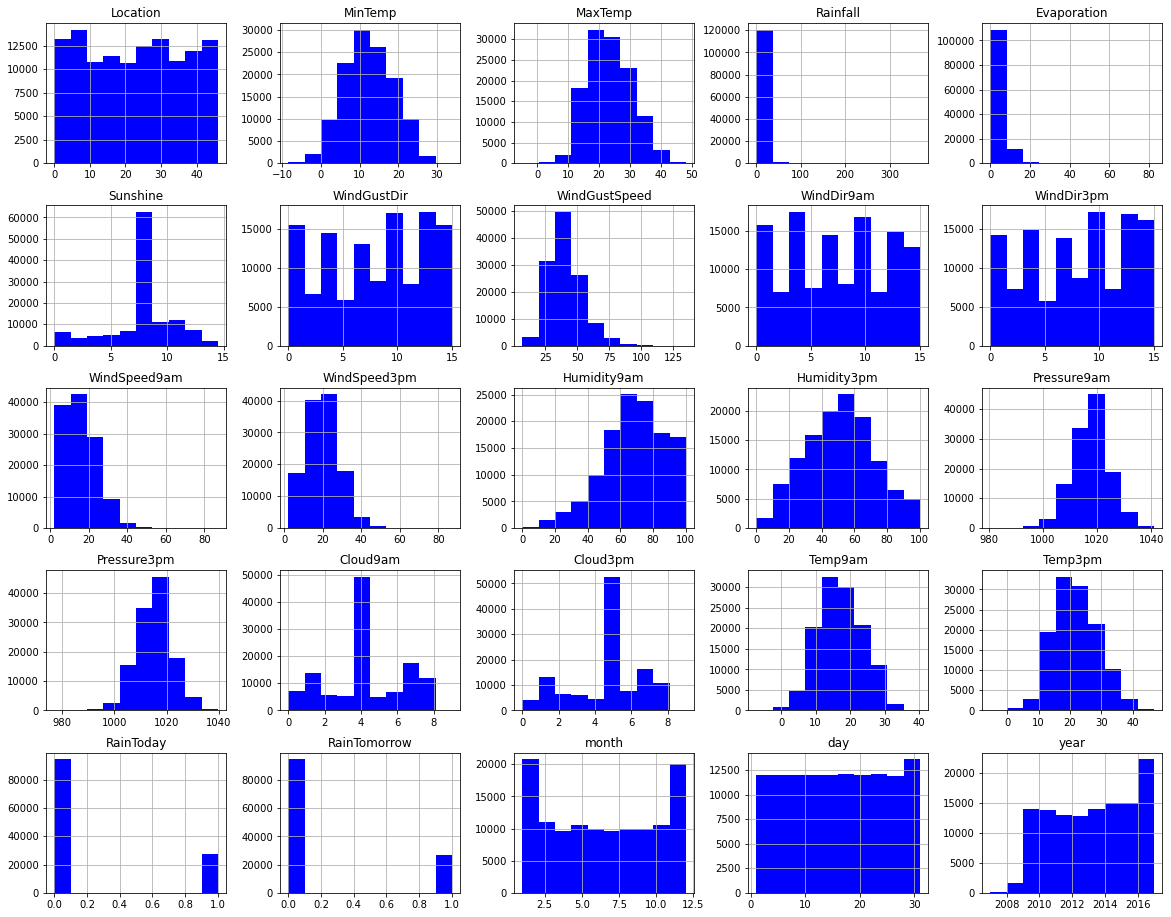

In [57]:
df.hist(figsize=(20,16), color = 'b')
plt.show()

In [58]:
df.RainToday.value_counts()

0    94537
1    27253
Name: RainToday, dtype: int64

In [59]:
zero  = df[df['RainTomorrow']==0]   
one = df[df['RainTomorrow']==1]  

df_minority_upsampled = resample(one, replace = True, n_samples = 80537) 

df = pd.concat([zero, df_minority_upsampled])
df = shuffle(df) 

In [60]:
zero  = df[df['RainToday']==0]   
one = df[df['RainToday']==1] 

df_minority_upsampled = resample(one, replace = True, n_samples = 108000) 

df = pd.concat([zero, df_minority_upsampled])
df = shuffle(df) # shuffling so that there is particular sequence

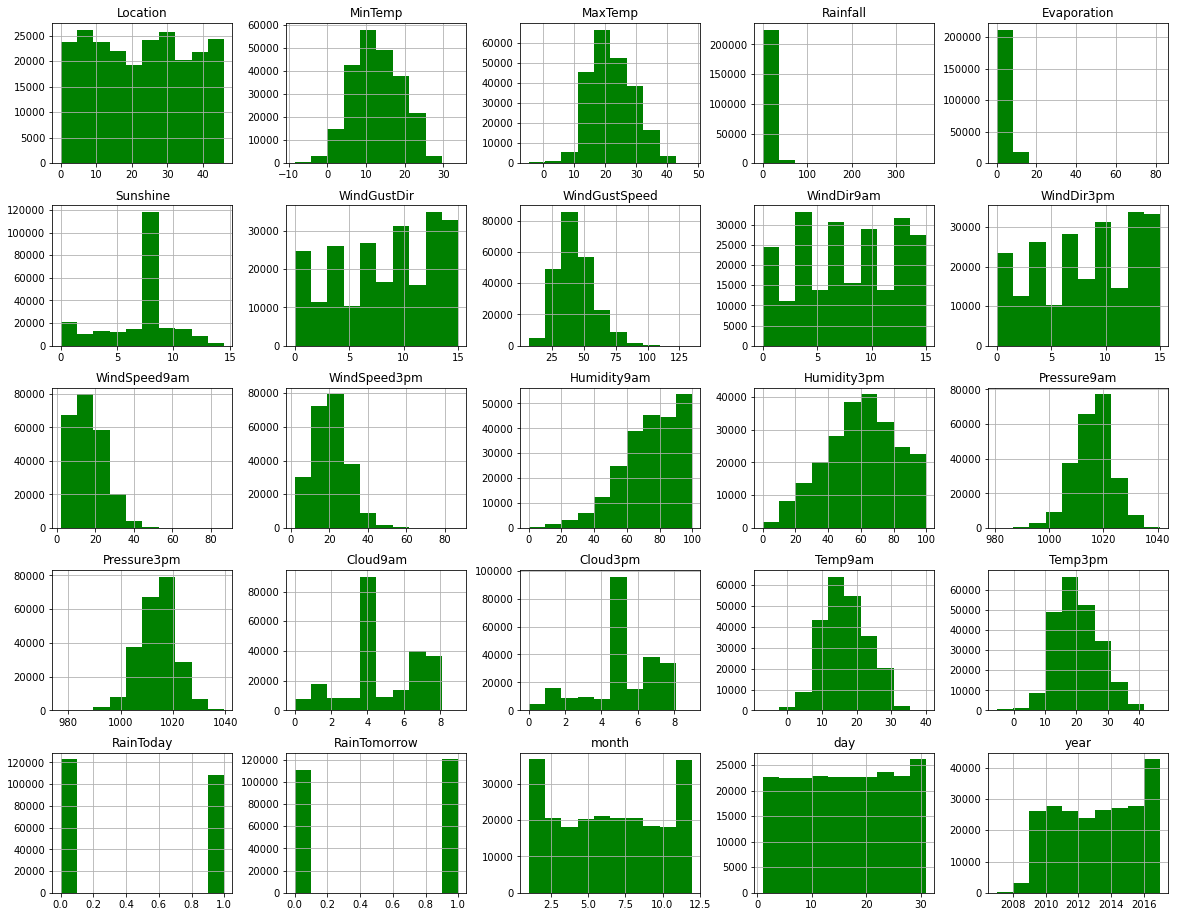

In [61]:
df.hist(figsize=(20,16), color = 'g');
plt.show();

In [62]:
df.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.538701
Sunshine         0.378795
RainToday        0.373227
Humidity9am      0.364992
Cloud3pm         0.364992
Cloud9am         0.320197
Pressure9am      0.267780
WindGustSpeed    0.262226
Pressure3pm      0.245663
Temp3pm          0.237700
Rainfall         0.234153
MaxTemp          0.201193
Evaporation      0.117432
WindSpeed9am     0.115488
WindSpeed3pm     0.111397
MinTemp          0.100996
WindGustDir      0.051892
Temp9am          0.042571
WindDir9am       0.035996
WindDir3pm       0.032154
year             0.017355
day              0.005603
Location         0.004883
month            0.001311
Name: RainTomorrow, dtype: float64

In [63]:
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [64]:
fs = SelectKBest(score_func=f_classif, k=15)
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(230987, 15)


In [65]:
cols = fs.get_support(indices=True)
X_new = X.iloc[:,cols]

In [66]:
X_new

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
1489,22.2,10.4,4.8,7.611178,46.0,24.0,20.0,84.0,84.0,1013.10000,1015.400000,8.000000,7.0,17.1,1
141418,32.7,0.0,6.8,8.500000,54.0,26.0,39.0,77.0,70.0,1007.80000,1004.900000,7.000000,5.0,31.9,0
89948,27.8,8.0,6.0,7.611178,48.0,22.0,33.0,81.0,57.0,1020.00000,1016.400000,8.000000,2.0,27.0,1
113173,15.9,5.2,4.8,7.611178,26.0,11.0,13.0,99.0,78.0,1017.40000,1014.400000,4.447461,5.0,14.1,1
1537,13.7,7.4,4.8,7.611178,39.0,11.0,15.0,97.0,79.0,1012.20000,1010.000000,8.000000,8.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64461,13.7,0.8,3.6,2.900000,50.0,24.0,13.0,95.0,54.0,1015.20000,1013.600000,7.000000,7.0,12.6,0
25615,33.1,0.0,4.8,7.611178,22.0,7.0,7.0,98.0,52.0,1017.64994,1015.255889,4.447461,5.0,32.1,0
9586,17.7,0.0,2.4,4.900000,41.0,22.0,26.0,53.0,76.0,1026.70000,1026.600000,4.000000,7.0,16.3,0
82781,23.0,1.0,6.4,10.600000,37.0,9.0,20.0,93.0,51.0,1011.00000,1012.700000,4.447461,5.0,21.5,0


### Scaling and Splitting

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Creating Model

In [68]:
model = Sequential()
model.add(Dense(1024, input_dim= 15, activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )

### Compiling Model

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

### Model Fitting

In [70]:
history = model.fit(X_train, y_train, epochs=50, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
1733/1733 [==============================] - 31s 17ms/step - loss: 0.4286 - binary_accuracy: 0.7993 - val_loss: 0.4168 - val_binary_accuracy: 0.8072
Epoch 2/50
1733/1733 [==============================] - 40s 23ms/step - loss: 0.4145 - binary_accuracy: 0.8066 - val_loss: 0.4072 - val_binary_accuracy: 0.8108
Epoch 3/50
1733/1733 [==============================] - 33s 19ms/step - loss: 0.4041 - binary_accuracy: 0.8122 - val_loss: 0.3972 - val_binary_accuracy: 0.8186
Epoch 4/50
1733/1733 [==============================] - 26s 15ms/step - loss: 0.3918 - binary_accuracy: 0.8188 - val_loss: 0.3873 - val_binary_accuracy: 0.8227
Epoch 5/50
1733/1733 [==============================] - 25s 15ms/step - loss: 0.3772 - binary_accuracy: 0.8283 - val_loss: 0.3781 - val_binary_accuracy: 0.8280
Epoch 6/50
1733/1733 [==============================] - 24s 14ms/step - loss: 0.3603 - binary_accuracy: 0.8376 - val_loss: 0.3693 - val_binary_accuracy: 0.8351
Epoch 7/50
1733/1733 [==================

### Model Evaluation

In [71]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

binary_accuracy: 93.16%


In [72]:
model.evaluate(X_test, y_test)

1805/1805 [==============================] - 9s 5ms/step - loss: 0.3467 - binary_accuracy: 0.9316


[0.3466501832008362, 0.9315808415412903]

In [73]:
model.evaluate(X_train, y_train)

5414/5414 [==============================] - 28s 5ms/step - loss: 0.0422 - binary_accuracy: 0.9854


[0.04218590632081032, 0.9854479432106018]

### Predictions

In [74]:
predictions =(model.predict(X_test)>0.5).astype("int32")
print(classification_report(y_test, predictions))

1805/1805 [==============================] - 10s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     27373
           1       0.91      0.96      0.94     30374

    accuracy                           0.93     57747
   macro avg       0.93      0.93      0.93     57747
weighted avg       0.93      0.93      0.93     57747



In [75]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1805/1805 [==============================] - 8s 5ms/step


<AxesSubplot:>

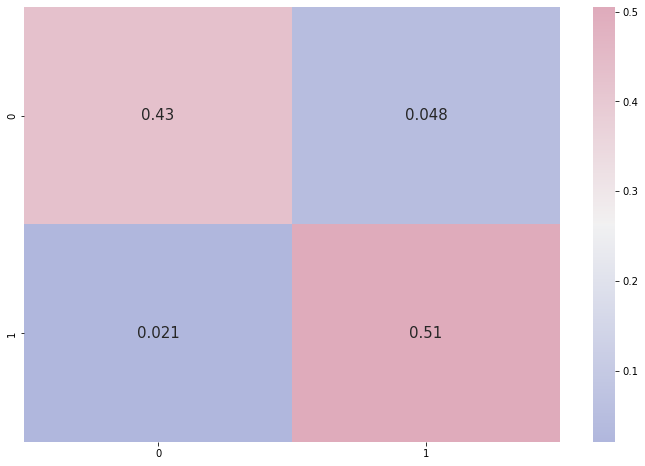

In [76]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})